## 1. Plotting the Data

In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(context="notebook", style="whitegrid", palette="dark")

In [8]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


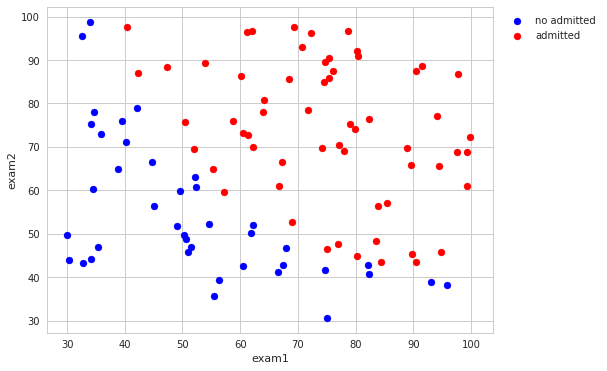

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

tp1 = data.query('admitted == 0')
tp1x1 = tp1.iloc[:, 0:1].as_matrix()
tp1x2 = tp1.iloc[:, 1:2].as_matrix()
st1 = ax.scatter(tp1x1, tp1x2, c='blue')

tp2 = data.query('admitted == 1')
tp2x1 = tp2.iloc[:, 0:1].as_matrix()
tp2x2 = tp2.iloc[:, 1:2].as_matrix()
st2 = ax.scatter(tp2x1, tp2x2, c='red')

ax.legend((st1, st2), ('no admitted', 'admitted'), loc=0, bbox_to_anchor=(1.25, 1))
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')
plt.show()

## 2. Logistic Regression
![avatar](img/1.png)

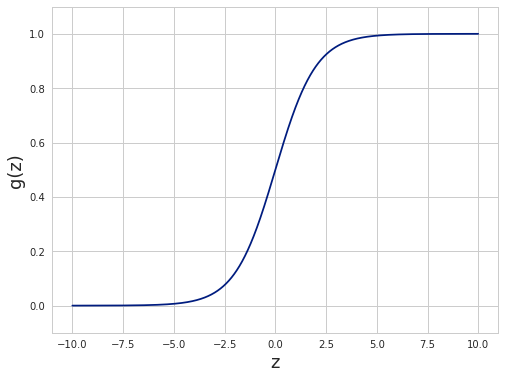

In [145]:
# 获取X，并设置x0=1
ones = pd.DataFrame({'ones': np.ones(len(data))})
X = pd.concat([ones, data], axis=1).iloc[:, :-1].as_matrix()
# 获取Y
Y = np.array(data.iloc[:, -1])
# 初始化theta
theta = np.zeros(X.shape[1])


def sigmoid(theta, X):
    """
    @param X: 样本集; m*n的矩阵，m为样本个数，n为样本特征个数，其中x0 = 1
    @param theta: 带求解的最佳θ; n维向量
    """
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))


# 代价函数
def cost(theta, X, Y):
    """
    @param X: 样本集; m*n的矩阵，m为样本个数，n为样本特征个数，其中x0 = 1
    @param Y: 样本结果;m维向量
    @param theta: 带求解的最佳θ; n维向量
    """
    m, n = X.shape
    return -(np.dot(Y, np.log(sigmoid(theta, X))) + np.dot((1 - Y), np.log(1 - sigmoid(theta, X))))/ m


def drawSigmoid():
    fig, ax = plt.subplots(figsize=(8, 6))
    theta = np.ones((1, 1))
    xs = np.arange(-10, 10, step=0.01)
    ax.plot(xs, sigmoid(theta, np.array([xs]).T))
    ax.set_ylim((-0.1,1.1))
    ax.set_xlabel('z', fontsize=18)
    ax.set_ylabel('g(z)', fontsize=18)
    plt.show()

            
drawSigmoid()

## 3. Gradient Descent
![avatar](img/2.png)

In [163]:
# 梯度函数
def gradient(theta, X, Y):
    m, n = np.shape(X)
    # m维向量
    inner = sigmoid(theta, X) - Y
    # n维向量
    return np.dot(X.T, inner) / m


# 梯度下降
def gradientDecent1(theta, X, Y, alpha, times):
    """
    @param alpha: 学习率
    @param times: 重复次数
    """
    for i in range(times):
        theta = theta - alpha * gradient(theta, X, Y)
        c = cost(theta, X, Y)
        print "%d: theta=%s, cost=%f" %(i, theta, c.item())


gradientDecent1(theta, X, Y, 0.01, 10)

0: theta=[ 0.001       0.12009217  0.11262842], cost=4.960600
1: theta=[-0.00299992 -0.08803412 -0.10584942], cost=8.645472
2: theta=[ 0.00299971  0.36026435  0.33787159], cost=nan
3: theta=[-0.00100029  0.15213514  0.11939003], cost=5.774430
4: theta=[-0.00500027 -0.05599341 -0.09909066], cost=6.910501
5: theta=[ 0.00099766  0.39222165  0.34455138], cost=nan
6: theta=[-0.00300234  0.18409245  0.12606982], cost=6.584694
7: theta=[-0.00700234 -0.0240366  -0.09241153], cost=5.183966
8: theta=[-0.00101746  0.42339398  0.35062696], cost=nan
9: theta=[-0.00501746  0.21526477  0.13214539], cost=7.365415


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


In [164]:
# 可以看到使用与线性回归的方法做梯度下降，效果并不理想
# 使用求解最小值函数代替(scipy.optimize.minimize)
import scipy.optimize as opt


ret = opt.minimize(fun=cost, 
                   x0=theta, args=(X, Y), 
                   method='Newton-CG',
                   jac=gradient)
print ret
final_theta = ret.x

     fun: 0.20349777133076524
     jac: array([  2.46665789e-05,   1.13898395e-03,   1.12594590e-03])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 28
    njev: 239
  status: 0
 success: True
       x: array([-25.1396864 ,   0.20605815,   0.20129687])


## 4. Decision boundary

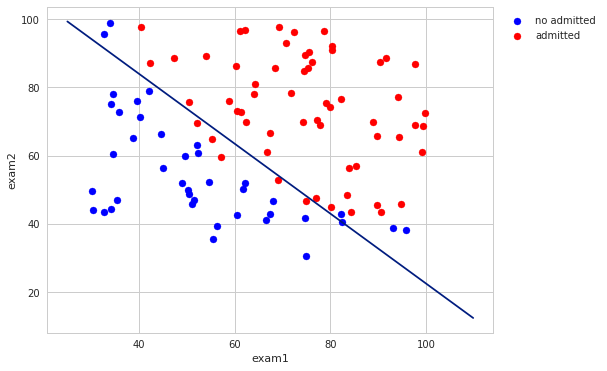

In [181]:
# 当前样本可以使用线性函数进行分割
# 所以 θ0 + θ1*x1 + θ2*x2 = 0 为决策边界
x1 = np.arange(25, 110, step=0.1)
#x2 = -(θ1*x1 + θ0) / θ2
x2 = -(final_theta[1] * x1 + final_theta[0]) / final_theta[2]

fig, ax = plt.subplots(figsize=(8, 6))
st1 = ax.scatter(tp1x1, tp1x2, c='blue')
st2 = ax.scatter(tp2x1, tp2x2, c='red')
line = ax.plot(x1, x2)

ax.legend((st1, st2), ('no admitted', 'admitted'), loc=0, bbox_to_anchor=(1.25, 1))
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')
plt.show()